In [0]:
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input, Reshape, Flatten, Deconvolution2D, Conv2DTranspose, MaxPooling2D, UpSampling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam
from keras.models import Model
from keras import backend as K
%matplotlib inline

# Autoencoder

In [71]:
# load data 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
print(x_test.shape)

(10000, 28, 28, 1)


In [0]:
#construct encoder
inp = Input(shape = (28, 28, 1))
e = Conv2D(32, (3, 3), activation='relu',padding='same')(inp)
e = MaxPooling2D((2, 2),padding='same')(e)
e = Conv2D(64, (3, 3), activation='relu',padding='same')(e)
e = MaxPooling2D((2, 2),padding='same')(e)
e = Conv2D(64, (3, 3), activation='relu',padding='same')(e)
l = Flatten()(e)
l = Dense(49, activation='softmax')(l)
# now the representation is (4,4,8), 128 dim

In [49]:
# construct decoder
d = Reshape((7,7,1))(l)
d = Conv2DTranspose(64,(3, 3), strides=2, activation='relu', padding='same')(d)
d = BatchNormalization()(d)
d = Conv2DTranspose(64,(3, 3), strides=2, activation='relu', padding='same')(d)
d = BatchNormalization()(d)
d = Conv2DTranspose(32,(3, 3), activation='relu', padding='same')(d)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(d)
# build model
ae = Model(inp, decoded)
ae.summary()










Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)          

In [0]:
ae.compile(optimizer="adam", loss="mse")


In [52]:
ae.fit(x_train, x_train, epochs=2)



Epoch 1/2
60000/60000 [==============================] - 474s 8ms/step - loss: 0.0144
Epoch 2/2
60000/60000 [==============================] - 472s 8ms/step - loss: 0.0079


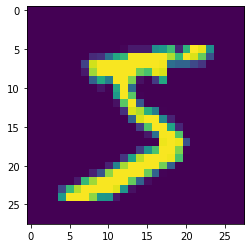

In [60]:
# visualize some examples
x =x_train[0].reshape(28,28)
plt.imshow(x)

60000/60000 [==============================] - 171s 3ms/step


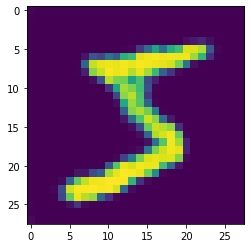

In [61]:
prediction = ae.predict(x_train, verbose=1, batch_size=100)
x =prediction[0].reshape(28,28)
plt.imshow(x)

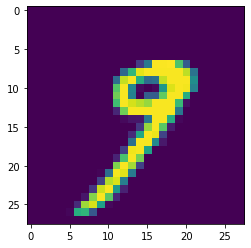

In [62]:
x =x_train[33].reshape(28,28)
plt.imshow(x)

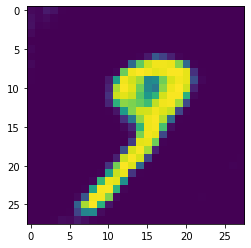

In [63]:
x =prediction[33].reshape(28,28)
plt.imshow(x)

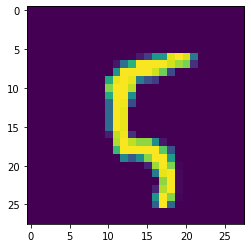

In [64]:
x =x_train[100].reshape(28,28)
plt.imshow(x)

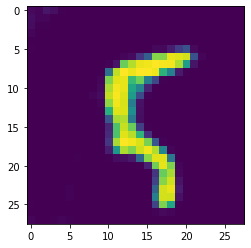

In [65]:
x =prediction[100].reshape(28,28)
plt.imshow(x)

# Image Classification
## 2.1 Deep CNN

In [72]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
# build the model
model = Sequential()
# add layers
model.add(Conv2D(64,kernel_size=3,activation='relu',strides=(1,1),padding='same',input_shape = (28,28,1)))
model.add(Conv2D(32,kernel_size=3,activation='relu',strides=(1,1),padding='same'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))


explanation on the model:

my first 2 layers are Conv2D layers. These will deal with our input images. The first convolutional layer has 64 nodes, and has 3*3 filter matrices. Our activation function is relu function. I am using default stride = 1, and  padding = 'same', which will result in padding the input such that the output has the same length as the original input.

My second convolutional layer is similar to the first except that it has 32 nodes.

Then I built a flatten layer here, as a connection between the convolution and dense layers.

The dense layer is for our input. Because we have 10 possible outcomes, we assign 10 nodes for the dense layer. 

The depth of my network is 4.



In [70]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [73]:
# train the model for 3 epoches
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 178s 3ms/step - loss: 0.1296 - acc: 0.9608 - val_loss: 0.0608 - val_acc: 0.9807
Epoch 2/3
60000/60000 [==============================] - 176s 3ms/step - loss: 0.0504 - acc: 0.9842 - val_loss: 0.0504 - val_acc: 0.9835
Epoch 3/3
60000/60000 [==============================] - 177s 3ms/step - loss: 0.0329 - acc: 0.9896 - val_loss: 0.0406 - val_acc: 0.9873


after 3 epoches, we can see that our model's accuracy on training dataset is 98.96%, on test set is 98.73%. (Since we are using test set as validation set here).  

## 2.2 Transfer Learning

using VGG for Mnist image classification. 

In [0]:
import sys
import numpy as np
import cv2
import sklearn.metrics as sklm

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.layers import Input, Flatten, Dense
from keras.models import Model, load_model
from keras.datasets import mnist

from keras import backend as K
img_dim_ordering = 'th'

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# converting it to RGB
x_train = [cv2.cvtColor(cv2.resize(i, (32,32)), cv2.COLOR_GRAY2BGR) for i in x_train]
x_train = np.concatenate([arr[np.newaxis] for arr in x_train]).astype('float32')

x_test = [cv2.cvtColor(cv2.resize(i, (32,32)), cv2.COLOR_GRAY2BGR) for i in x_test]
x_test = np.concatenate([arr[np.newaxis] for arr in x_test]).astype('float32')


In [0]:
x_train.shape[1:]

In [0]:
model_vgg16_conv = VGG16(weights='imagenet', include_top=False)
# Make vgg16 model layers as non trainable
for layer in model_vgg16_conv.layers:
    layer.trainable = False

#Create your own input format
inp = Input(shape=(32,32,3))

#Use the generated model 
output_vgg16_conv = model_vgg16_conv(inp)

#Add the fully-connected layers 
x = Flatten(name='flatten')(output_vgg16_conv)
x = Dense(256, activation='relu', name='fc1')(x)
x = Dense(64, activation='relu', name='fc2')(x)
x = Dense(10, activation='softmax', name='predictions')(x)

pretrained_model = Model(inputs=inp, outputs=x)


In [112]:
pretrained_model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
vgg16 (Model)                multiple                  14714688  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
fc1 (Dense)                  (None, 256)               131328    
_________________________________________________________________
fc2 (Dense)                  (None, 64)                16448     
_________________________________________________________________
predictions (Dense)          (None, 10)                650       
Total params: 14,863,114
Trainable params: 148,426
Non-trainable params: 14,714,688
________________________________________

In [0]:
pretrained_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [118]:
# train the model for 2 epoches
pretrained_model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 769s 13ms/step - loss: 0.2734 - acc: 0.9140 - val_loss: 0.2025 - val_acc: 0.9334
Epoch 2/2
60000/60000 [==============================] - 754s 13ms/step - loss: 0.1749 - acc: 0.9436 - val_loss: 0.1774 - val_acc: 0.9453


after 2 epoches, we can see that our model's accuracy on training dataset is 94.36%, on test set is 94.53%. (Since we are using test set as validation set here).

# Text Classification

## 3.1 RNN

use a embedding + LSTM here

In [0]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re

In [0]:
cwd = os.getcwd()

In [121]:
# --- Config Check --- 
# - GPU: Check -
print(device_lib.list_local_devices())

# - Ensuring we have sufficient buffer size -
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

# - Creating session -
sess = tf.Session(config=config)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14094917259528058921
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 7219482436328606116
physical_device_desc: "device: XLA_CPU device"
]


In [0]:
# read in the data
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':"1PhaIfXOC1mlkT_qAWCm1c-VZB4zV5SGT"})  
downloaded.GetContentFile('tweets_with_labels.csv')     

In [0]:
# read in the data 
import pandas as pd
df = pd.read_csv('tweets_with_labels.csv',sep='\t',error_bad_lines=False)

In [146]:
df.head()

,id,tweet,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15
0,1,Jazz for a Rainy Afternoon: {link},0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
1,2,RT: @mention: I love rainy days.,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
2,3,Good Morning Chicago! Time to kick the Windy C...,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0
3,6,Preach lol! :) RT @mention: #alliwantis this t...,0.0,0.0,0.0,0.0,0.0,0.0,0.604,0.0,0.196,0.0,0.0,0.0,0.201,0.0,0.0
4,9,@mention good morning sunshine,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,1.000,0.0,0.0


In [0]:
# drop all na data
df= df.dropna()


In [150]:
# labels
df.columns

Index(['id', 'tweet', 'k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9',
       'k10', 'k11', 'k12', 'k13', 'k14', 'k15'],
      dtype='object')

In [152]:
# get labels for our dataset
df_labels = df[['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9','k10', 'k11', 'k12', 'k13', 'k14', 'k15']]
df_labels.head()

,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.604,0.0,0.196,0.0,0.0,0.0,0.201,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,1.000,0.0,0.0


In [0]:
# function for cleaning the text
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [0]:
# store output in y value 
import re
X = []
sentences = list(df["tweet"])
for sen in sentences:
    X.append(preprocess_text(sen))

y = df_labels.values

In [0]:
# split data into training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [0]:
# convert text inputs into embedded vectors
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1
# Max number of words
max_features = 10000

maxlen = 64

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [176]:
print('input_train shape:', X_train.shape)
print('input_test shape:', y_train.shape)

input_train shape: (54562, 64)
input_test shape: (54562, 15)


In [0]:
# --- Training model: Embedding + RNN ---
model = Sequential()
model.add(Embedding(max_features, 32))
#model.add(SimpleRNN(32))
#model.add(GRU(32))
model.add(LSTM(32))
model.add(Dense(15, activation ='sigmoid'))


In [0]:
# Max number of comments read in at at ime
batch_size = 64

In [179]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_8 (Dense)              (None, 15)                495       
Total params: 328,815
Trainable params: 328,815
Non-trainable params: 0
_________________________________________________________________


In [203]:
# --- Locations to save model ---
save_path_weights = os.path.join(cwd,'rnn_weights.h5')
save_path_model = os.path.join(cwd,'rnn_model.h5')

# --- Compile Model ---
#Compile model
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics=['acc'])

# If we want to checkpoint our model so we don't rerun it
checkpointer = ModelCheckpoint(filepath=save_path_weights, 
                               verbose=1, save_best_only=True)


# Verbose=0 -> to avoid jupyter notebook freezing
history = model.fit(X_train, y_train, 
                    epochs = 10, batch_size = 64, 
                    validation_split = 0.2,verbose=1)

Train on 43649 samples, validate on 10913 samples
Epoch 1/10
43649/43649 [==============================] - 51s 1ms/step - loss: 1.3908 - acc: 0.7621 - val_loss: 1.8137 - val_acc: 0.5270
Epoch 2/10
43649/43649 [==============================] - 44s 1ms/step - loss: 1.4876 - acc: 0.7127 - val_loss: 1.4839 - val_acc: 0.7531
Epoch 3/10
43649/43649 [==============================] - 47s 1ms/step - loss: 1.4442 - acc: 0.7606 - val_loss: 1.7306 - val_acc: 0.6764
Epoch 4/10
43649/43649 [==============================] - 45s 1ms/step - loss: 1.4412 - acc: 0.7620 - val_loss: 1.5107 - val_acc: 0.7407
Epoch 5/10
43649/43649 [==============================] - 49s 1ms/step - loss: 1.4233 - acc: 0.7608 - val_loss: 1.4788 - val_acc: 0.7594
Epoch 6/10
43649/43649 [==============================] - 52s 1ms/step - loss: 1.3941 - acc: 0.7795 - val_loss: 1.4077 - val_acc: 0.7776
Epoch 7/10
43649/43649 [==============================] - 45s 1ms/step - loss: 1.3526 - acc: 0.7868 - val_loss: 1.4046 - val_acc

## 3.2 CNN

In [0]:
# import libs
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D

In [0]:
# set parameters
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 10

In [0]:
# build model
model = Sequential()
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.2))
# add a Convolution1D, which will learn filters
# word group filters of size filter_length
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(15))
model.add(Activation('sigmoid'))

In [191]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 64, 50)            500000    
_________________________________________________________________
dropout_8 (Dropout)          (None, 64, 50)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 62, 250)           37750     
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 250)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 250)               62750     
_________________________________________________________________
dropout_9 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_104 (Activation)  (None, 250)              

In [199]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# use the same proportion for training and validation here
history_cnn = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split = 0.2)

Train on 43649 samples, validate on 10913 samples
Epoch 1/10
43649/43649 [==============================] - 34s 788us/step - loss: 1.0401 - acc: 0.8231 - val_loss: 1.0775 - val_acc: 0.8166
Epoch 2/10
43649/43649 [==============================] - 30s 684us/step - loss: 1.0159 - acc: 0.8272 - val_loss: 1.0867 - val_acc: 0.8185
Epoch 3/10
43649/43649 [==============================] - 30s 694us/step - loss: 0.9916 - acc: 0.8325 - val_loss: 1.0947 - val_acc: 0.8192
Epoch 4/10
43649/43649 [==============================] - 30s 689us/step - loss: 0.9722 - acc: 0.8372 - val_loss: 1.1037 - val_acc: 0.8133
Epoch 5/10
43649/43649 [==============================] - 30s 693us/step - loss: 0.9571 - acc: 0.8372 - val_loss: 1.1090 - val_acc: 0.8146
Epoch 6/10
43649/43649 [==============================] - 31s 699us/step - loss: 0.9397 - acc: 0.8412 - val_loss: 1.1192 - val_acc: 0.8139
Epoch 7/10
43649/43649 [==============================] - 30s 696us/step - loss: 0.9287 - acc: 0.8425 - val_loss: 1.

## 3.3 Compare two models 

RNN:

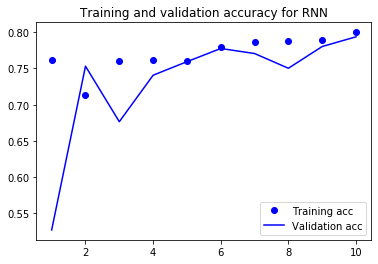

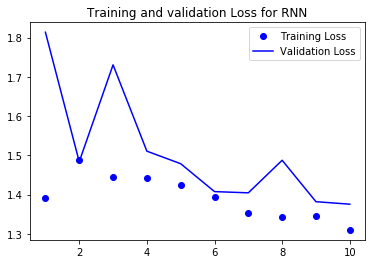

In [204]:
# --- Plotting performance ---
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy for RNN')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation Loss for RNN')
plt.legend()

plt.show()

CNN:

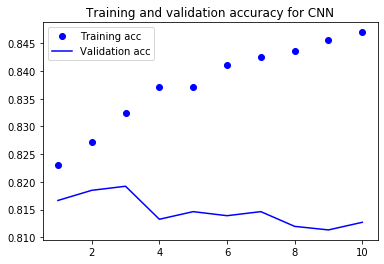

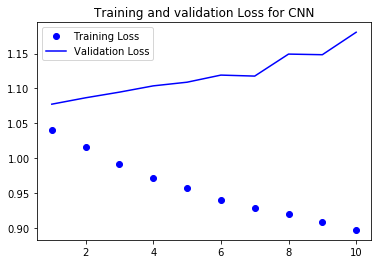

In [205]:
# --- Plotting performance ---
acc = history_cnn.history['acc']
val_acc = history_cnn.history['val_acc']
loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy for CNN')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and validation Loss for CNN')
plt.legend()

plt.show()

**Conclusion:** 

From the above performances plots, we could observe that:
* In general, this simple RNN does a similar level of performance with CNN here. We see that RNN could reach an accuracy level of about 80% for validation set, while CNN reaches an accuracy of around 82% after 10 epoches.
* RNN tends to be more 'unstable' than CNN. We see the accuracy level and loss of RNN has a sharper curve than CNN. CNN tends to learn in a more stable rate in this case. 